In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
car = pd.read_csv('Car_cleaned_with_Model.csv')
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

car['brand_enc']= label_encoder.fit_transform(car['Brand'])
print('Brand Label saved')


car['body_enc']= label_encoder.fit_transform(car['Body'])
print('Body label saved')


car['engine_type_enc']= label_encoder.fit_transform(car['Engine Type'])
print('Engine type label saved')

car['regis_enc']= label_encoder.fit_transform(car['Registration'])
print('Registration label saved')

car['model_enc']= label_encoder.fit_transform(car['Model'])
print('Model label saved')


car_2 = car.drop(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], axis=1)

car_2.head()

Brand Label saved
Body label saved
Engine type label saved
Registration label saved
Model label saved


,Price,Mileage,EngineV,Year,brand_enc,body_enc,engine_type_enc,regis_enc,model_enc
0,4200.0,277,2.0,1991,1,3,3,1,17
1,7900.0,427,2.9,1999,2,5,0,1,248
2,13300.0,358,5.0,2003,2,3,1,1,222
3,23000.0,240,4.2,2007,0,0,3,1,211
4,18300.0,120,2.0,2011,5,0,3,1,214


In [4]:
X = car_2.drop('Price', axis=1)
y = car_2['Price']

X.shape, y.shape

((3867, 8), (3867,))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3093, 8), (3093,), (774, 8), (774,))

In [6]:
from sklearn.ensemble import  RandomForestRegressor

rf_1 = RandomForestRegressor()

X_train = X_train.values

In [7]:
rf_1.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
y_pred_train = rf_1.predict(X_train)

from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))

print('RMSE on Training data ',format(rmse_train))

RMSE on Training data  2015.9763846250987


In [9]:
y_pred_test = rf_1.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))

print('RMSE on Testing data ',format(rmse_test))

RMSE on Testing data  5030.6459929142775


In [10]:
from sklearn.metrics import r2_score

y_pred_train = rf_1.predict(X_train)

print('Traning Score: ',format(r2_score(y_train, y_pred_train)))

Traning Score:  0.9885156943208818


In [11]:
y_pred_test = rf_1.predict(X_test)
print('Testing Score:' ,format(r2_score(y_test, y_pred_test)))

Testing Score: 0.9375245979063602


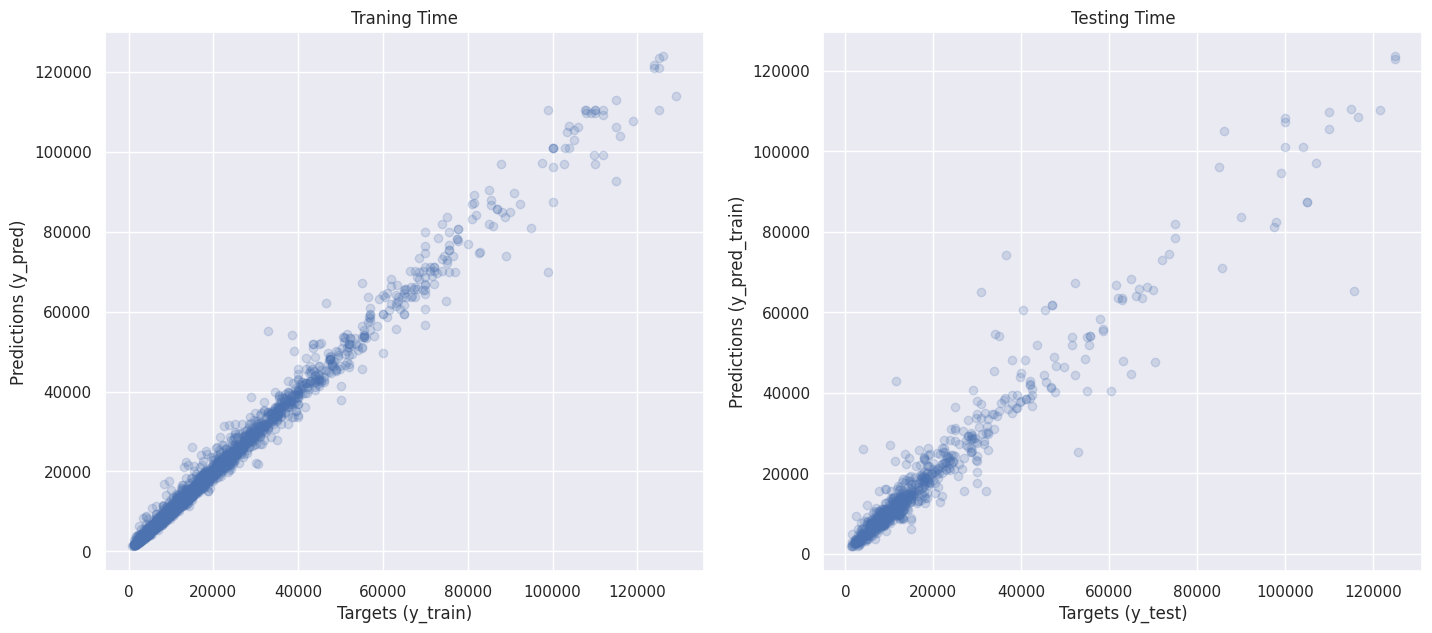

In [12]:
plt.figure(figsize=(17,7))
y_pred_train = rf_1.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Traning Time');

y_pred_test = rf_1.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time');

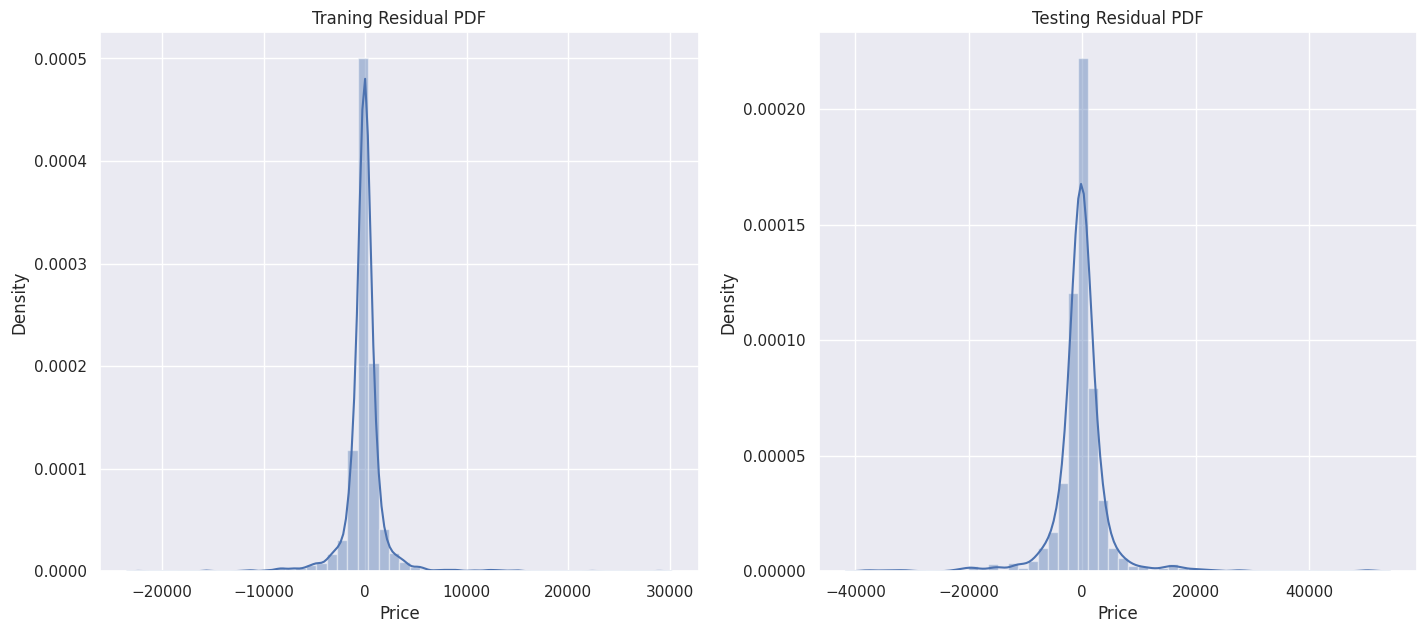

In [13]:
residual_train = (y_train - rf_1.predict(X_train))
residual_test = (y_test - rf_1.predict(X_test))

plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.distplot(residual_train);
plt.title('Traning Residual PDF');


plt.subplot(1,2,2)
sns.distplot(residual_test);
plt.title('Testing Residual PDF');

In [14]:
df_eval = pd.DataFrame(rf_1.predict(X_test) , columns=['Prediction'])
y_test = y_test.reset_index(drop = True)
df_eval['Target'] = y_test

df_eval['Residual'] = df_eval['Target'] - df_eval['Prediction']
df_eval['Difference %'] = np.absolute(df_eval['Residual'] / df_eval['Target'] * 100)
df_eval

,Prediction,Target,Residual,Difference %
0,17882.100000,19000.0,1117.900000,5.883684
1,6113.150000,5500.0,-613.150000,11.148182
2,24846.250000,19200.0,-5646.250000,29.407552
3,12652.370000,11900.0,-752.370000,6.322437
4,9187.410000,7750.0,-1437.410000,18.547226
...,...,...,...,...
769,108563.000000,116500.0,7937.000000,6.812876
770,10722.050000,13200.0,2477.950000,18.772348
771,28146.038095,27500.0,-646.038095,2.349229
772,15903.780000,16500.0,596.220000,3.613455


In [15]:
df_eval.describe()

,Prediction,Target,Residual,Difference %
count,774.000000,774.000000,774.000000,774.000000
mean,18846.254945,18602.017829,-244.237115,17.228295
std,19525.669051,20139.559184,5027.962745,30.423515
min,1774.650000,1200.000000,-37709.984048,0.019565
25%,7900.216250,7500.000000,-1341.932500,3.983440
50%,11790.930000,11900.000000,-153.990000,9.853881
75%,21863.157500,20999.060000,1022.675000,20.872395
max,123569.000000,125000.000000,50343.358333,537.215854


In [16]:
import joblib

joblib.dump(rf_1, 'rf1_base_rf.pkl', compress=3)

['rf1_base_rf.pkl']